### The 2D Burgers' Equation

The 2D Burgers' equation is a partial differential equation (PDE) that describes the motion of a viscous fluid in two dimensions. It can model a variety of physical phenomena, including shock waves and turbulence. The equation is given by:

$$ 
\frac{\partial u(x, y, t)}{\partial t} + u(x, y, t) \frac{\partial u(x, y, t)}{\partial x} + v(x, y, t) \frac{\partial u(x, y, t)}{\partial y} = \nu \left( \frac{\partial^2 u(x, y, t)}{\partial x^2} + \frac{\partial^2 u(x, y, t)}{\partial y^2} \right)
$$

Where:
- \( u(x, y, t) \) is the velocity field in the \( x \)-direction.
- \( v(x, y, t) \) is the velocity field in the \( y \)-direction.
- \( \nu \) is the kinematic viscosity, which controls the diffusion of momentum.
- \( \frac{\partial u}{\partial t} \) is the time derivative of the velocity.
- \( \frac{\partial u}{\partial x} \) and \( \frac{\partial u}{\partial y} \) are the spatial derivatives in the \( x \)- and \( y \)-directions, respectively.
- The term on the right-hand side represents the diffusion of the velocity field in space.

### Numerical Solution Using Finite Differences

Similar to the 1D heat equation, the 2D Burgers' equation can be solved numerically using the finite difference method, where both space and time are discretized into a grid.

- **Spatial grid (\( x, y \))**: The domain is discretized into \( nx \) and \( ny \) grid points for the \( x \)- and \( y \)-directions.
- **Time grid (\( t \))**: The simulation runs for \( nt \) time steps with each step being of size \( dt \).

The numerical approximation of the 2D Burgers' equation is:

$$
u(i, j, t+1) = u(i, j, t) - \frac{u(i, j, t) \cdot \Delta t}{\Delta x} \left( u(i, j, t) - u(i-1, j, t) \right) - \frac{v(i, j, t) \cdot \Delta t}{\Delta y} \left( u(i, j, t) - u(i, j-1, t) \right) + \nu \cdot \frac{\Delta t}{\Delta x^2} \left( u(i+1, j, t) - 2u(i, j, t) + u(i-1, j, t) \right)
$$

$$
v(i, j, t+1) = v(i, j, t) - \frac{u(i, j, t) \cdot \Delta t}{\Delta x} \left( v(i, j, t) - v(i-1, j, t) \right) - \frac{v(i, j, t) \cdot \Delta t}{\Delta y} \left( v(i, j, t) - v(i, j-1, t) \right) + \nu \cdot \frac{\Delta t}{\Delta x^2} \left( v(i+1, j, t) - 2v(i, j, t) + v(i-1, j, t) \right)
$$

Where:
- \( u(i, j, t) \) and \( v(i, j, t) \) are the velocity fields at grid point \( (i, j) \) and time step \( t \).
- \( \Delta x \) and \( \Delta y \) are the spatial grid steps in the \( x \)- and \( y \)-directions.
- \( \Delta t \) is the time step.
- The terms \( \left( u(i, j, t) - u(i-1, j, t) \right) \) and similar terms represent the spatial derivatives approximated using finite differences.
- The diffusion terms \( \frac{\Delta t}{\Delta x^2} \left( u(i+1, j, t) - 2u(i, j, t) + u(i-1, j, t) \right) \) represent the second-order derivatives in space.

### Boundary and Initial Conditions

- **Initial Condition**: The initial velocity fields \( u(x, y, t=0) \) and \( v(x, y, t=0) \) are set to specific values, often representing an initial disturbance in the fluid.
- **Boundary Conditions**: The boundary conditions are set to constant values at the edges of the domain, for example:
  - \( u(x=0, y, t) = 1 \), \( u(x=L, y, t) = 1 \)
  - \( v(x, y=0, t) = 1 \), \( v(x, y=L, t) = 1 \)

### Visualization

After the simulation, we can visualize the results by plotting the velocity fields at different time steps. Here, we will use contour plots to show the evolution of \( u(x, y) \) and \( v(x, y) \) over time.

#### Initial Condition Plot:

```python
plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution (Initial Condition)")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Time and space variables
nt = 500  # Number of time steps
nx = 51  # Number of grid points in the x-direction
ny = 51  # Number of grid points in the y-direction

# Physical constants
nu = 0.1  # Kinematic viscosity
dt = .001  # Time step


In [4]:

# Space discretization
dx = 2 / (nx - 1)  # Grid spacing in the x-direction
dy = 2 / (ny - 1)  # Grid spacing in the y-direction
x = np.linspace(0, 2, nx)  # x coordinates
y = np.linspace(0, 2, ny)  # y coordinates


In [5]:

# Create initial velocity field (combustion term is zero initially)
comb = np.zeros((ny, nx))  # Combustion term (not used in this code)
u = np.zeros((ny, nx))  # u velocity field (in the x-direction)
v = np.zeros((ny, nx))  # v velocity field (in the y-direction)

# Placeholder for updated velocities during the iterations
un = np.zeros((ny, nx))  # Temporary storage for the u field
vn = np.zeros((ny, nx))  # Temporary storage for the v field

# Arrays to store the velocity fields at each time step for later visualization
uf = np.zeros((nt, ny, nx))  # u velocity over time
vf = np.zeros((nt, ny, nx))  # v velocity over time

# Initial condition setup
u = np.ones((ny, nx))  # Initialize u velocity field to 1
v = np.ones((ny, nx))  # Initialize v velocity field to 1
uf = np.ones((nt, ny, nx))  # Initialize u velocity over time
vf = np.ones((nt, ny, nx))  # Initialize v velocity over time


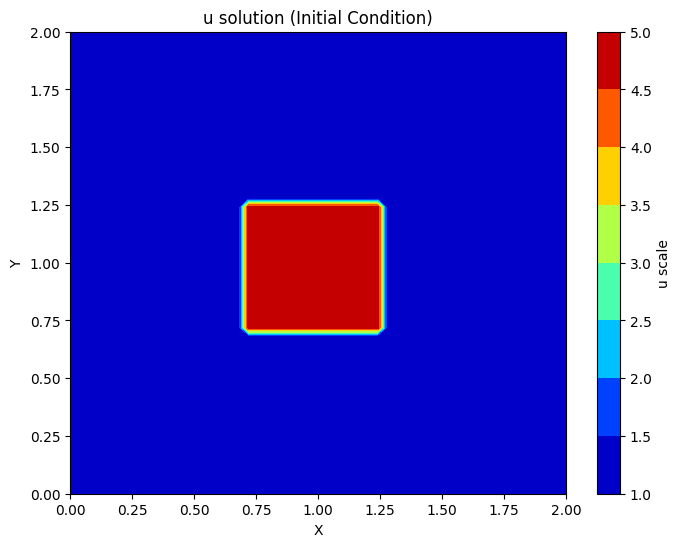

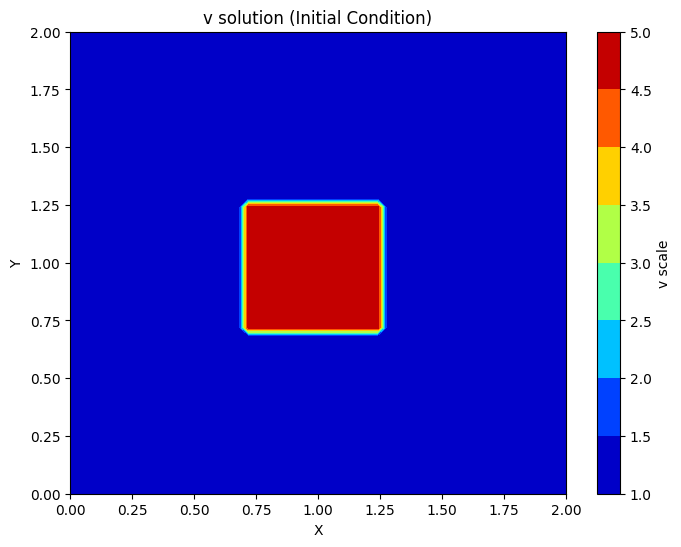

In [6]:

# Set initial disturbance in the center of the domain
# Defining a square disturbance in the center of the grid
u[int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5
v[int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5

# Store the initial condition in the velocity time arrays
uf[0, int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5
vf[0, int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5

# Create meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Plot the initial condition for u (velocity in the x-direction)
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution (Initial Condition)")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

# Plot the initial condition for v (velocity in the y-direction)
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution (Initial Condition)")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")


In [9]:

# Time-stepping loop (main part of the simulation)
for n in range(1, nt):
    un = u.copy()  # Copy the current velocity field to the temporary variable
    vn = v.copy()  # Copy the current velocity field to the temporary variable

    # Loop through the interior grid points (excluding boundary points)
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # Discretization of the 2D Burgers' equation for u velocity
            u[i, j] = (un[i, j] 
                        - (un[i, j] * dt / dx * (un[i, j] - un[i - 1, j])) 
                        - (vn[i, j] * dt / dy * (un[i, j] - un[i, j - 1])) 
                        + (nu * dt / (dx ** 2)) * (un[i + 1, j] - 2 * un[i, j] + un[i - 1, j]) 
                        + (nu * dt / (dy ** 2)) * (un[i, j + 1] - 2 * un[i, j] + un[i, j - 1]))

            # Discretization of the 2D Burgers' equation for v velocity
            v[i, j] = (vn[i, j] 
                        - (un[i, j] * dt / dx * (vn[i, j] - vn[i - 1, j])) 
                        - (vn[i, j] * dt / dy * (vn[i, j] - vn[i, j - 1])) 
                        + (nu * dt / (dx ** 2)) * (vn[i + 1, j] - 2 * vn[i, j] + vn[i - 1, j]) 
                        + (nu * dt / (dy ** 2)) * (vn[i, j + 1] - 2 * vn[i, j] + vn[i, j - 1]))

            # Store the updated velocity values at the current time step
            uf[n, i, j] = u[i, j]
            vf[n, i, j] = v[i, j]

    # Apply boundary conditions for u and v velocity fields (constant values at the edges)
    u[:, 0] = 1  # Left boundary of u
    u[:, -1] = 1  # Right boundary of u
    u[0, :] = 1  # Bottom boundary of u
    u[-1, :] = 1  # Top boundary of u
    v[:, 0] = 1  # Left boundary of v
    v[:, -1] = 1  # Right boundary of v
    v[0, :] = 1  # Bottom boundary of v
    v[-1, :] = 1  # Top boundary of v


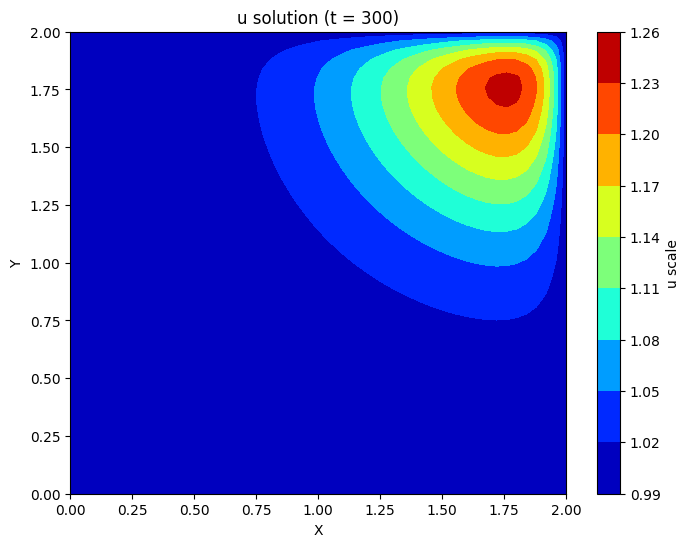

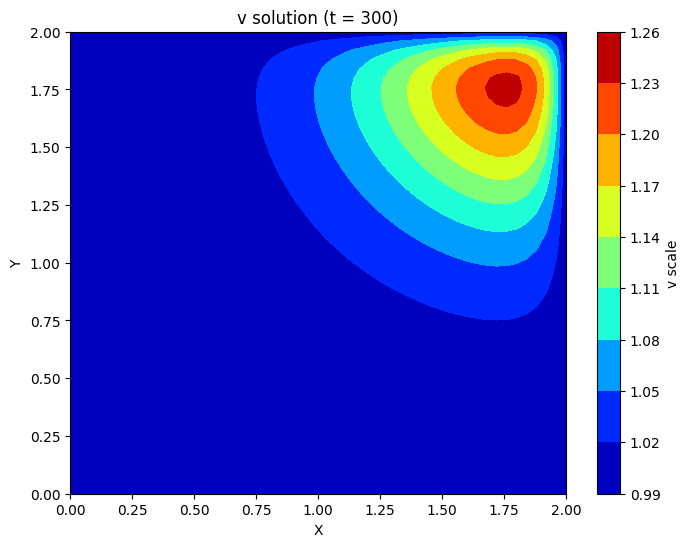

In [10]:

# After the simulation, plot the results at a specific time step
X, Y = np.meshgrid(x, y)

# Plot the u velocity field at a later time step (for example, at time step 30)
u = uf[300, :, :]  # Extract the velocity field at time step 30
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution (t = 300)")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

# Plot the v velocity field at the same time step
v = vf[300, :, :]  # Extract the velocity field at time step 30
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution (t = 300)")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")
